# Supervised Learning (Regression)

In supervised learning, the task is to infer hidden structure from
labeled data, comprised of training examples $\{(x_n, y_n)\}$.
Regression typically means the output $y$ takes continuous values.


In [2]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

#import edward as ed
import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf

#from edward.models import Normal

plt.style.use('ggplot')

/Users/flo/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/flo/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data

Simulate training and test sets of $40$ data points. They comprise of
pairs of inputs $\mathbf{x}_n\in\mathbb{R}^{10}$ and outputs
$y_n\in\mathbb{R}$. They have a linear dependence with normally
distributed noise.

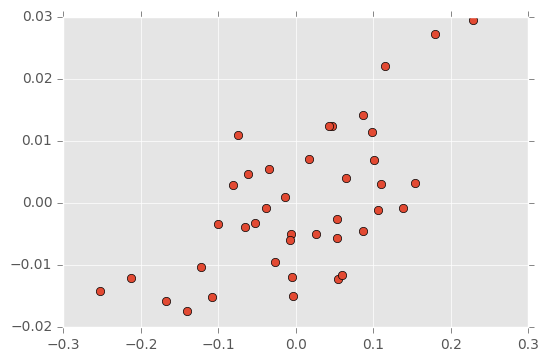

In [16]:
def build_toy_dataset(N, w):
  D = len(w)

  x = np.random.normal(0.0, 0.1, size=(N, D))
  y = np.dot(x, w) + np.random.normal(0.0, 0.01, size=N)
  return x, y


#ed.set_seed(42)

N = 40  # number of data points
D = 1  # number of features

w1_true = np.random.randn(D) * 0.5
X_train, y_train = build_toy_dataset(N, w1_true)
X_test, y_test = build_toy_dataset(N, w1_true)

plt.plot(X_train,y_train,'o')
plt.show()


## Model

Posit the model as Bayesian linear regression (Murphy, 2012).
It assumes a linear relationship between the inputs
$\mathbf{x}\in\mathbb{R}^D$ and the outputs $y\in\mathbb{R}$.

For a set of $N$ data points $(\mathbf{X},\mathbf{y})=\{(\mathbf{x}_n, y_n)\}$,
the model posits the following distributions:

\begin{align*}
  p(\mathbf{w})
  &=
  \text{Normal}(\mathbf{w} \mid \mathbf{0}, \sigma_w^2\mathbf{I}),
  \\[1.5ex]
  p(b)
  &=
  \text{Normal}(b \mid 0, \sigma_b^2),
  \\
  p(\mathbf{y} \mid \mathbf{w}, b, \mathbf{X})
  &=
  \prod_{n=1}^N
  \text{Normal}(y_n \mid \mathbf{x}_n^\top\mathbf{w} + b, \sigma_y^2).
\end{align*}

The latent variables are the linear model's weights $\mathbf{w}$ and
intercept $b$, also known as the bias.
Assume $\sigma_w^2,\sigma_b^2$ are known prior variances and $\sigma_y^2$ is a
known likelihood variance. The mean of the likelihood is given by a
linear transformation of the inputs $\mathbf{x}_n$.

Let's build the model in Edward, fixing $\sigma_w,\sigma_b,\sigma_y=1$.

In [17]:
#np.random.normal
w1_true

array([ 0.08304453])

## Inference

We now turn to inferring the posterior using variational inference.
Define the variational model to be a fully factorized normal across
the weights.

In [18]:
noiseSD = 0.01  # noise SD
priorSigma = 1.   # SD of prior
likelihoodPrecision = 1./noiseSD
w_posterior_sd = 1./(1./priorSigma + 
                     likelihoodPrecision*np.dot(X_train.T, X_train))
w_posterior_mean = likelihoodPrecision*w_posterior_sd*\
                    np.dot(X_train.T, y_train)


posterior SD 0.0222156299669
[[ 0.06860401]]


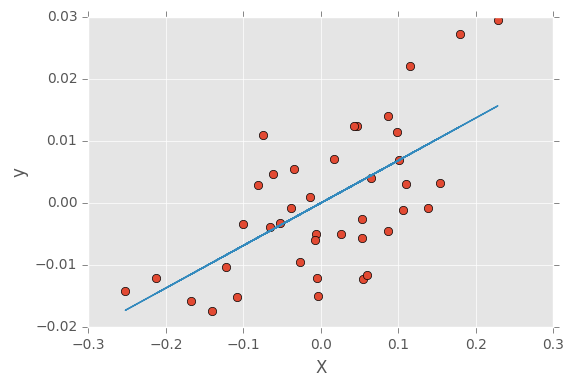

In [19]:
print('posterior SD', w_posterior_sd[0][0])
print(w_posterior_mean)
plt.plot(X_train,y_train,'o')
plt.plot(X_train,w_posterior_mean*X_train);plt.xlabel('X'); plt.ylabel('y')
plt.show()


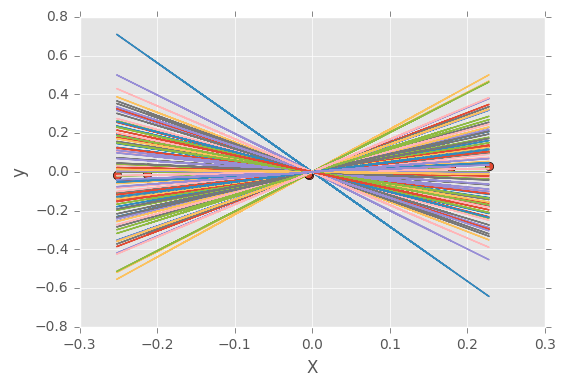

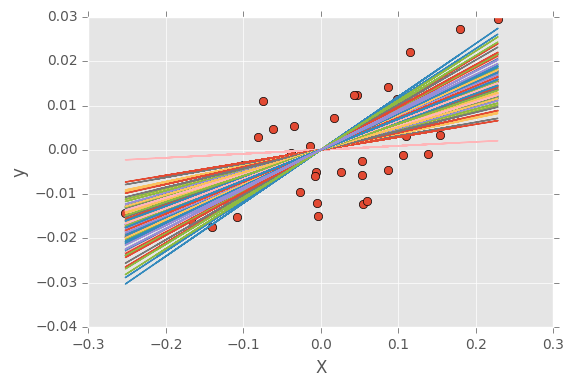

In [21]:
n_sample = 100

plt.plot(X_train,y_train,'o')
for i in range(n_sample):
    w_sample_prior = priorSigma*np.random.randn()
    plt.plot(X_train,w_sample_prior*X_train);plt.xlabel('X'); plt.ylabel('y')
plt.show()

plt.plot(X_train,y_train,'o')
for i in range(n_sample):
    w_sample_posterior = w_posterior_sd*np.random.randn()+w_posterior_mean
    plt.plot(X_train,w_sample_posterior*X_train);plt.xlabel('X'); plt.ylabel('y')
plt.show()



In [22]:
pred_mean = np.dot(w_posterior_mean,X_test.T)
pred_sd = noiseSD + X_test.T*w_posterior_sd*X_test


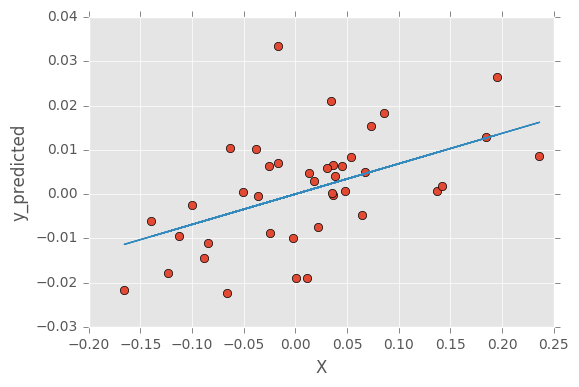

In [23]:
plt.plot(X_test,y_test,'o')
plt.plot(X_test,pred_mean.T);plt.xlabel('X'); plt.ylabel('y_predicted')
plt.show()

#todo: add error bars

The model has learned a linear relationship between the
first dimension of $\mathbf{x}\in\mathbb{R}^D$ and the outputs
$y\in\mathbb{R}$.